<h1>Import Libraries</h1>


In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# To display all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Import Test and Training Set</h1>

In [2]:
# Import csv file and store them as pandas objects
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
print('The train set has the shape {}'.format(train.shape))
train.head(5)
train.columns

The train set has the shape (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train.count() #Is there any NaN cell among 891 entries?

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Comment:
1. 2 people not known where they got aboard
2. 187 age figures were missing

22nd March: 
Previously, the missing age figures were cleaned up by inserting 0. This lowers down the mean/median of the age column. 

<h1>Problem</h1>

<u>To predict the survival status of passengers in the test set.</u>
* Supervised learning problem
* Outcome is dead or alive (0 or 1). This is a classification problem.
* Denote Survived as Y. Every other column of the training set can become independent variables X so long as useful information is extracted.
* Normalization of continuous variables (age, fare) is recommended.
* The train data can also be splitted into train and dev set in 70% to 30% proportion. 

<h1>Data Visualization</h1>

Categorize data and visualize relationship between different factors and survival status by the following two methods:

1. Groupby
2. Barplot (Seaborn)

<h2>Sex</h2>

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


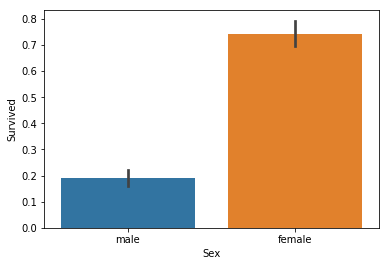

In [6]:
train.groupby(['Sex']).mean()
sns.barplot(x='Sex', y='Survived', data=train)

In [20]:
#Convert the sex label of passengers into boolean values, where male = 1 and non-male =0
train['Sex'] = (train['Sex'] == 'male')*1
test['Sex'] = (test['Sex'] == 'male')*1

In [21]:
train[['Sex','Survived']].corr()

,Sex,Survived
Sex,1.000000,-0.543351
Survived,-0.543351,1.000000


Comment: corr=-0.543351 indicates mild correlation between survival and sex. Male were more likely succumbed than female. 

<h2>Ticket Class (Pclass)</h2>

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.564815,36.812130,0.416667,0.356481,84.154687
2,445.956522,0.472826,0.586957,29.765380,0.402174,0.380435,20.662183
3,439.154786,0.242363,0.706721,25.932627,0.615071,0.393075,13.675550


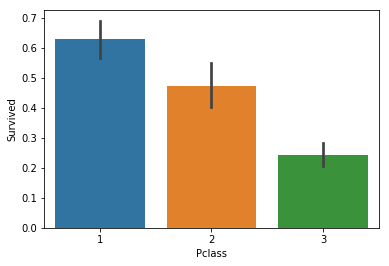

In [24]:
train.groupby(['Pclass']).mean()
sns.barplot(x='Pclass', y='Survived', data=train)

One may also group by ticket class and sex as follows:

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  SexBool  
Pclass Sex                          
1      female  106.125798      0.0  
       male     67.226127      1.0  
2      female   21.970121      0.0  
       male     19.741782      1.0  
3      female   16.118810      0.0  
       male     12.661633      1.0

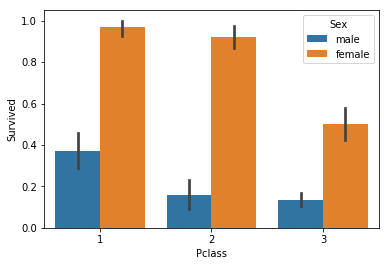

In [10]:
train.groupby(['Pclass','Sex']).mean()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

<h1>Age</h1>

In [25]:
#Calculate the age median from train and test set
allage = pd.concat([train['Age'],test['Age']]) #combine train['Age'] and test['Age'] into a new object
allage.count() 
allage.shape[0]
allage.median()
allage.mean()

1309

1309

28.0

29.50318563789152

In [18]:
#So I must do some data cleaning, since Age contains NaN
#train[train['Age'].isnull()].index
#train.drop(train[train['Age'].isnull()].index, inplace=True)  #Regretted, as some test data also miss age

train.fillna({'Age':allage.median()},inplace=True);
test.fillna({'Age':allage.median()},inplace=True);

<h2>Number of Siblings/Spouses Aboard (SibSp)</h2>

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare
SibSp,,,,,,,
0,455.370066,0.345395,2.351974,0.713816,30.631990,0.185855,25.692028
1,439.727273,0.535885,2.057416,0.492823,29.829761,0.655502,44.147370
2,412.428571,0.464286,2.357143,0.535714,23.196429,0.642857,51.753718
3,321.562500,0.250000,2.562500,0.312500,17.437500,1.312500,68.908862
4,381.611111,0.166667,3.000000,0.666667,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,0.800000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,0.571429,28.000000,2.000000,69.550000


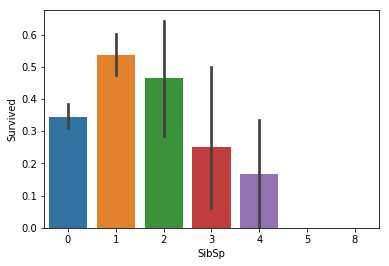

In [26]:
train.groupby(['SibSp']).mean()
sns.barplot(x='SibSp', y='Survived', data=train)

<h2>Number of Parents/Children Aboard (Parch)</h2>

,PassengerId,Survived,Pclass,Age,SibSp,Fare,SexBool
Parch,,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774,0.713864
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180,0.491525
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604,0.387500
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660,0.200000
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750,0.500000
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000,0.200000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000,0.000000


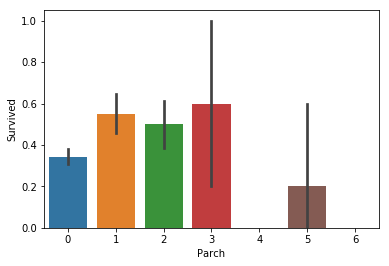

In [12]:
train.groupby(['Parch']).mean()
sns.barplot(x='Parch', y='Survived',data=train)

<h2>Fare</h2>

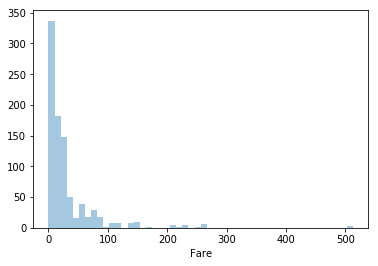

In [13]:
train.groupby(['Fare']).mean();
sns.distplot(train['Fare'], kde=False);

In [14]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR, Q1, Q3)

23.0896 7.9104 31.0


"The Freedman-Diaconis rule..."

https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram

In [15]:
h = 2*IQR/(train['PassengerId'].count()**(1/3)) #bin width
h #bin width
w1 = (train['Fare'].max() - train['Fare'].min())/h
w1 #number of bins :( 
w2 = (train['Fare'].max() - train['Fare'].min())/20
w2

4.799034112500582

106.75673229024956

25.61646

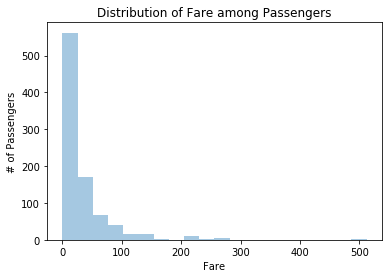

In [16]:
train.groupby(['Fare']).mean();
fare_dist = sns.distplot(train['Fare'],bins=20,kde=False);
fare_dist.set_title('Distribution of Fare among Passengers');
fare_dist.set_ylabel('# of Passengers');
#Still haven't got a mind to make Fare histogram look better. May treat dimensionality reduction with Pclass

Other factors that may relate to survival rate:

* Title of passenger
* Cabin number they belong
* Age

<h1>KNN</h1>

Use Age, Sex and PClass to predict

In [18]:
X = train[['Pclass','Age','SexBool']] # where X is training data 
Y = train[['Survived']] # where Y is label of training data ()
X_test = test[['Pclass','Age','SexBool']]

In [19]:
#import scikit-learn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

In [20]:
neigh.fit(X,Y)

/Users/jern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
neigh.fit(X,Y)

/Users/jern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
Y_hat = neigh.predict(X_test)

In [23]:
Y_hat #So now I have some survival prediction?

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h1>Export</h1>

In [54]:
Survived = pd.Series(Y_hat, name = 'Survived')

In [52]:
Survived

0      0
1      0
2      0
3      1
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     0
      ..
388    0
389    0
390    0
391    1
392    1
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    1
404    1
405    0
406    0
407    0
408    1
409    0
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [26]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [60]:
output = test['PassengerId'].to_frame().join(Survived.to_frame())

In [69]:
output;

In [68]:
output.to_csv('solution.csv', index=False)